In [ ]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Loading dataset
dataset = load_dataset("pkchwy/letterboxd-all-movie-data")

train = dataset['train']

df = pd.json_normalize(train)



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

full_dump.jsonl:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/847209 [00:00<?, ? examples/s]

In [ ]:
# Basic statistics
total_films_count = len(train)
print(f"Total films: {total_films_count}")
unique_film_titles = df['title'].unique()
print(unique_film_titles)
unique_films_count = len(unique_film_titles)
print(f"Unique films: {unique_films_count}")
filtered_df = df.drop_duplicates(subset=['title'])
print(f"filtered df size: {len(filtered_df)}")
total_films_count = len(filtered_df)

print(f"List of films for all {filtered_df['genres'].explode().value_counts().head(25)}")
print(f"Total genres: {filtered_df['genres'].explode().value_counts().size}")

def count_gt_n(my_df, n):
  return my_df['genres'].apply(lambda x: len(x) if isinstance(x, (list, tuple)) else 0).gt(n).sum()

def count_eq_n(my_df, n):
  return my_df['genres'].apply(lambda x: len(x) if isinstance(x, (list, tuple)) else 0).eq(n).sum()

count_4_plus = count_gt_n(filtered_df,3)
count_3 = count_eq_n(filtered_df, 3)
count_2 = count_eq_n(filtered_df, 2)
count_1 = count_eq_n(filtered_df, 1)
count_0 = count_eq_n(filtered_df, 0)
sum = (count_0 + count_1 + count_2 + count_3 + count_4_plus) / total_films_count
print(f"total recall of genres: {sum * 100}%")

print(f"films with more than 3 genres: {count_2}/{total_films_count} - {count_2 / total_films_count *100 :.2f}%")
print(f"films with 3 genres: {count_3}/{total_films_count} - {count_3 /total_films_count * 100:.2f}%")
print(f"films with 2 genres: {count_2}/{total_films_count} - {count_2/total_films_count * 100 :.2f}%")
print(f"films with only 1 genre: {count_1}/{total_films_count} - {count_1/total_films_count * 100 :.2f}%")
print(f"films with no genre: {count_0}/{total_films_count} - {count_0/total_films_count * 100 :.2f}%")

zero = filtered_df['genres'].apply(lambda x: len(x) if isinstance(x, (list, tuple)) else 0).eq(0)
filtered_df = filtered_df[~zero]
total_films_count = len(filtered_df)
count_0 = count_eq_n(filtered_df,0)
print(f"films with no genre after filter: {count_0}/{total_films_count} - {count_0/total_films_count * 100 :.2f}%")
count_4_plus = count_gt_n(filtered_df,3)
count_3 = count_eq_n(filtered_df, 3)
count_2 = count_eq_n(filtered_df, 2)
count_1 = count_eq_n(filtered_df, 1)
sum = (count_0 + count_1 + count_2 + count_3 + count_4_plus) / total_films_count
print(f"total recall of genres: {sum * 100}%")

print(f"films with more than 3 genres: {count_2}/{total_films_count} - {count_2 / total_films_count *100 :.2f}%")
print(f"films with 3 genres: {count_3}/{total_films_count} - {count_3 /total_films_count * 100:.2f}%")
print(f"films with 2 genres: {count_2}/{total_films_count} - {count_2/total_films_count * 100 :.2f}%")
print(f"films with only 1 genre: {count_1}/{total_films_count} - {count_1/total_films_count * 100 :.2f}%")


zero = filtered_df['synopsis'].apply(lambda x: len(x) if isinstance(x, str) else 0).eq(0)
print(f"synopsis that have nulls: {zero}")

Total films: 847209
['Come and See' 'Seven Samurai' 'High and Low' ... 'Wonderwell'
 'The Changeover' 'Leprechaun: The Beginning']
Unique films: 694516
filtered df size: 694516
List of films for all genres
Drama                                                 170603
Documentary                                           137493
Comedy                                                114738
Animation                                              46976
Horror                                                 41367
Romance                                                38576
Music                                                  35831
Thriller                                               32539
Action                                                 31564
Crime                                                  27241
Family                                                 22319
TV Movie                                               21091
Adventure                                              18414
F

In [ ]:
import numpy as np
import html

from nltk.corpus import stopwords
import string

all_synopsis = filtered_df["synopsis"]
len_synopsis = filtered_df["synopsis"].fillna("").apply(len).tolist()
total_empty_sinopsis = len_synopsis.count(0)
print(f"Total empty Synopsis: {total_empty_sinopsis}")

mean_len_before_filtering = np.mean(len_synopsis)
print(f"Synopsis mean len with empty: {mean_len_before_filtering}")
filtered_df = filtered_df[filtered_df["synopsis"].fillna("").apply(len) > 0]
print(f"Filtered_df len: {len(filtered_df)}")

len_synopsis = filtered_df["synopsis"].apply(len).tolist()
mean_len_before_filtering = np.mean(len_synopsis)
print(f"Synopsis mean len without empty: {mean_len_before_filtering}")

stop_words = stopwords.words("english")

def preprocess_text(text: str) -> str:
    """Limpia antes de tokenizar."""
    text = text.lower()
    text = text.replace("\\\\n", " ")
    text = html.unescape(text)
    exclude = {'#', "'", "@"}
    text = ''.join(char for char in text if char not in string.punctuation or char in exclude)
    return text


Total empty Synopsis: 64766
Synopsis mean len with empty: 243.9918008134053
Filtered_df len: 457237
Synopsis mean len without empty: 278.5523743704031


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


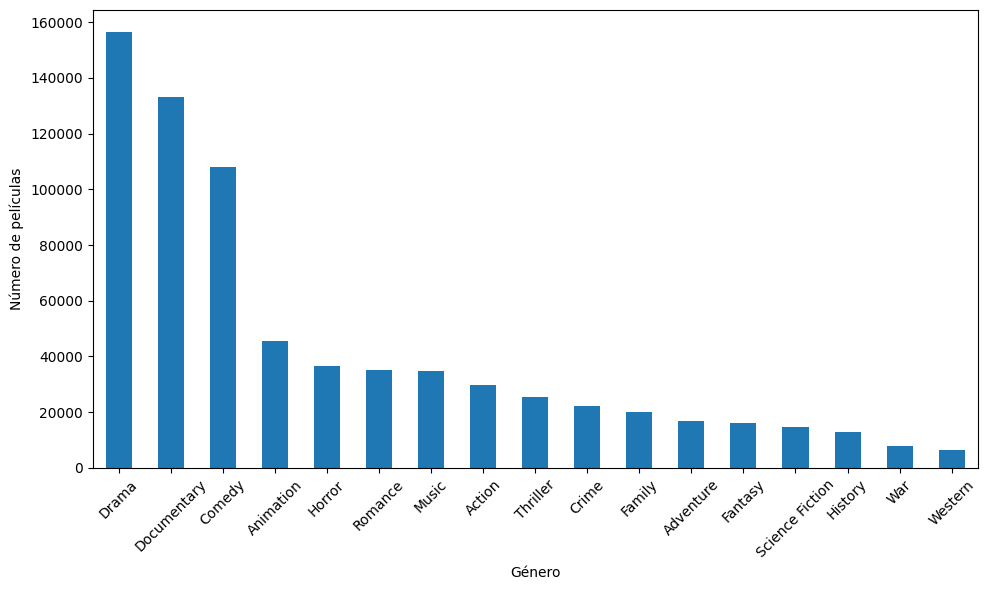

In [ ]:
top18 = [
    "Drama", "Documentary", "Comedy", "Animation",
    "Horror", "Romance", "Thriller", "Music",
    "Action", "Crime", "Family", "Adventure",
    "Fantasy", "Science Fiction", "Mistery", "History",
    "War", "Western"
]
mask = filtered_df["genres"].apply(lambda g: all(genre in top18 for genre in g))
top_movies = filtered_df[mask].copy()

all_genres = top_movies["genres"].explode()

genre_counts = all_genres.value_counts()

top10 = genre_counts.head(20)

# Plot
plt.figure(figsize=(10, 6))
top10.plot(kind="bar")

plt.xlabel("Género")
plt.ylabel("Número de películas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


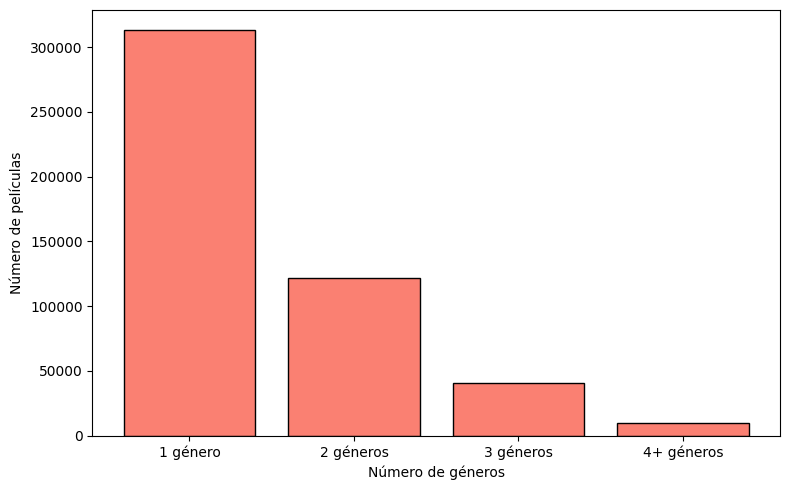

In [ ]:
genre_counts_per_movie = top_movies["genres"].apply(lambda x: len(x) if isinstance(x, (list, tuple)) else 0)

genre_distribution = {
    "1 género": (genre_counts_per_movie == 1).sum(),
    "2 géneros": (genre_counts_per_movie == 2).sum(),
    "3 géneros": (genre_counts_per_movie == 3).sum(),
    "4+ géneros": (genre_counts_per_movie >= 4).sum()
}

plt.figure(figsize=(8, 5))
plt.bar(genre_distribution.keys(), genre_distribution.values(), color="salmon", edgecolor="black")

plt.xlabel("Número de géneros")
plt.ylabel("Número de películas")
plt.tight_layout()
plt.show()

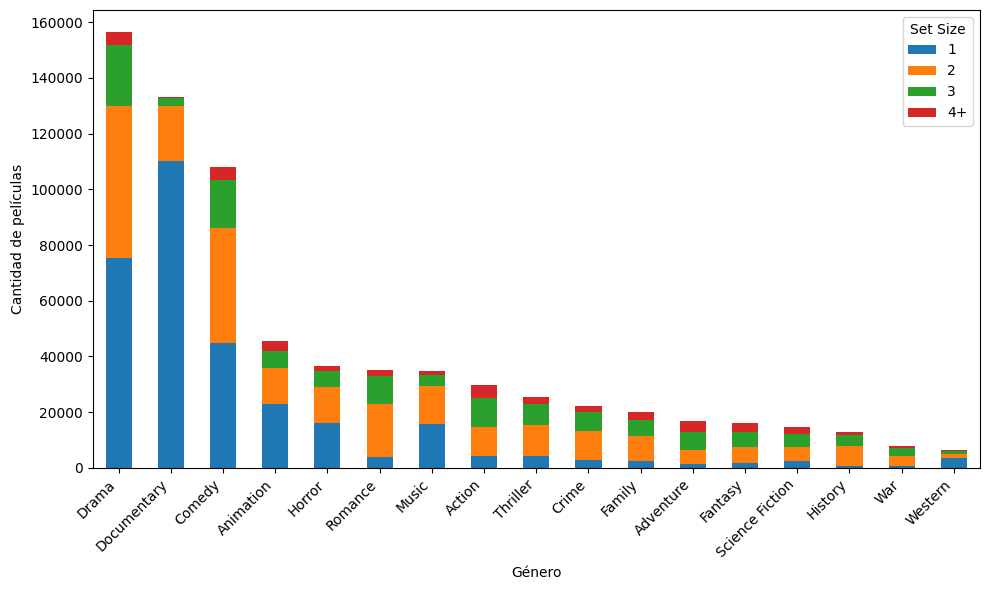

In [ ]:
# get the top 10 genres and classify them based on the amount of appeareances
top18 = [
    "Drama", "Documentary", "Comedy", "Animation",
    "Horror", "Romance", "Thriller", "Music",
    "Action", "Crime", "Family", "Adventure",
    "Fantasy", "Science Fiction", "Mistery", "History",
    "War", "Western"
]

# Step 1: Expand rows so each genre has its own row
mask = filtered_df["genres"].apply(lambda g: all(genre in top18 for genre in g))
filtered = filtered_df[mask].copy()
exploded = filtered.explode("genres")


# Step 2: Add a column for the set size (how many genres in that row’s original list)
exploded["set_size"] = exploded.groupby(level=0)["genres"].transform("size")

# Step 3: Categorize set size into bins (1,2,3,4+)
def bucket(n):
    if n == 1:
        return "1"
    elif n == 2:
        return "2"
    elif n == 3:
        return "3"
    else:
        return "4+"

exploded["set_size_bucket"] = exploded["set_size"].apply(bucket)

# Step 4: Count frequencies
counts = exploded.groupby(["genres", "set_size_bucket"]).size().unstack(fill_value=0)

# Step 5: Get top 10 genres overall
top_genres = exploded["genres"].value_counts().head(18).index
counts = counts.loc[top_genres]

# Step 6: Plot stacked bar chart
counts.plot(kind="bar", stacked=True, figsize=(10,6))
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.legend(title="Set Size")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
